# 다시 손질

In [70]:
df = pd.read_csv('어쩌면최종데이터.csv')
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Columns: 209 entries, Date to 글로벌EPU_PPP기준
dtypes: float64(189), int64(18), object(2)
memory usage: 6.8+ MB


Index(['Date', '미환율_종가', '미환율_시가', '미환율_고가', '미환율_저가', '미환율_변동%', 'WTI유_종가',
       'WTI유_시가', 'WTI유_고가', 'WTI유_저가',
       ...
       '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU',
       '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준'],
      dtype='object', length=209)

In [71]:
print(df.columns.tolist())

['Date', '미환율_종가', '미환율_시가', '미환율_고가', '미환율_저가', '미환율_변동%', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', 'S&P500_종가', 'S&P500_시가', 'S&P500_고가', 'S&P500_저가', 'S&P500_변동%', '다우존스_종가', '다우존스_시가', '다우존스_고가', '다우존스_저가', '다우존스_거래량', '다우존스_변동%', '상해종합_종가', '상해종합_시가', '상해종합_고가', '상해종합_저가', '상해종합_거래량', '상해종합_변동%', '닛케이_종가', '닛케이_시가', '닛케이_고가', '닛케이_저가', '닛케이_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', 'return', 'log_return', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'sma_5', 'std_5', 'sma_10', 'std_10', 'sma_20', 'std_20', 'sma_60', 'std_60', 'bb_upper', 'bb_lower', 'bb_width', 'volatility_20', 'momentum_5', 'momentum_10', 'momentum_20', 'rsi_14', 'macd', 'macd_si

In [73]:
import pandas as pd

# 파일 불러오기
df = df

# ✅ 미국 환율 관련 가격 컬럼만 제거
price_cols = [col for col in df.columns if col.startswith('미환율_') and any(x in col for x in ['시가', '종가', '고가', '저가', '변동%'])]

# ✅ 파생변수 관련 컬럼 제거 조건
technical_prefixes = [
    'return', 'log_return', 'lag_', 'sma_', 'std_', 'bb_', 'volatility_',
    'momentum_', 'rsi_', 'macd', 'sto_', 'VWAP', 'Volume',
    'alpha', 'adv', 'cap'
]
technical_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in technical_prefixes)]

# ✅ 제거 컬럼 최종 리스트
drop_cols = list(set(price_cols + technical_cols))

# ✅ 제거 실행
df_cleaned = df.drop(columns=drop_cols)

# ✅ 결과 확인
print(f"제거된 컬럼 수: {len(drop_cols)}")
print(f"남은 컬럼 수: {len(df_cleaned.columns)}")


제거된 컬럼 수: 122
남은 컬럼 수: 87


In [76]:
print(df_cleaned.columns.tolist())

['Date', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', 'S&P500_종가', 'S&P500_시가', 'S&P500_고가', 'S&P500_저가', 'S&P500_변동%', '다우존스_종가', '다우존스_시가', '다우존스_고가', '다우존스_저가', '다우존스_거래량', '다우존스_변동%', '상해종합_종가', '상해종합_시가', '상해종합_고가', '상해종합_저가', '상해종합_거래량', '상해종합_변동%', '닛케이_종가', '닛케이_시가', '닛케이_고가', '닛케이_저가', '닛케이_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', '기준년월', '한국(M1)조원', '한국(M1)변동%', '한국(M2)조원', '한국(M2)변동%', '미국(M1)십억달러', '미국(M2)십억달러', '소비자심리지수', '생산자물가지수', '산업생산지수', '외환보유액(억달러)', '경상수지', '미국소비자물가지수', '비트코인_검색량', '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준']


In [77]:
df_cny=pd.read_csv('파생변수포함위안화데이터.csv')

In [79]:
df_cny.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [80]:
print(df_cny.columns.tolist())

['Date', 'Close', 'Open', 'High', 'Low', '변동%', 'return', 'log_return', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'sma_5', 'std_5', 'sma_10', 'std_10', 'sma_20', 'std_20', 'sma_60', 'std_60', 'bb_upper', 'bb_lower', 'bb_width', 'volatility_20', 'momentum_5', 'momentum_10', 'momentum_20', 'rsi_14', 'macd', 'macd_sig', 'macd_hist', 'sto_k', 'sto_d', 'M2(100 million yuan)', 'Volume', 'M0(100 million yuan)', 'alpha2', 'alpha4', 'alpha7', 'alpha9', 'VWAP', 'alpha10', 'alpha11', 'alpha12', 'alpha13', 'alpha16', 'adv20', 'alpha17', 'alpha18', 'alpha20', 'alpha21', 'alpha23', 'alpha24', 'alpha25', 'alpha27', 'alpha28', 'alpha29', 'alpha30', 'alpha31', 'alpha33', 'alpha34', 'alpha35', 'alpha37', 'returns', 'alpha38', 'alpha41', 'alpha42', 'alpha43', 'alpha46', 'alpha47', 'alpha49', 'cap', 'alpha56', 'alpha57', 'alpha58', 'alpha51', 'alpha54', 'alpha60', 'adv180', 'adv120', 'adv60', 'adv50', 'adv15', 'alpha61', 'alpha62', 'alpha64', 'alpha65', 'alpha67', 'alpha68', 'alpha70', 'adv5', 'adv10',

In [81]:
import pandas as pd

# 1. 날짜 형식 통일
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cny['Date'] = pd.to_datetime(df_cny['Date'])

# 2. 중국환율 가격 컬럼명 변경
rename_map = {
    'Open': '중국환율_시가',
    'High': '중국환율_고가',
    'Low': '중국환율_저가',
    'Close': '중국환율_종가',
    '변동%': '중국환율_변동%'
}
df_cny_renamed = df_cny.rename(columns=rename_map)

# 3. 병합 대상 컬럼 구성
cols_to_add = ['Date'] + list(rename_map.values()) + [
    col for col in df_cny_renamed.columns if col not in ['Date'] + list(rename_map.keys())
]

# 4. 병합
df_final = df_cleaned.merge(df_cny_renamed[cols_to_add], on='Date', how='left')


In [94]:
print(df_final.columns.tolist())

['Date', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', 'S&P500_종가', 'S&P500_시가', 'S&P500_고가', 'S&P500_저가', 'S&P500_변동%', '다우존스_종가', '다우존스_시가', '다우존스_고가', '다우존스_저가', '다우존스_거래량', '다우존스_변동%', '상해종합_종가', '상해종합_시가', '상해종합_고가', '상해종합_저가', '상해종합_거래량', '상해종합_변동%', '닛케이_종가', '닛케이_시가', '닛케이_고가', '닛케이_저가', '닛케이_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', '기준년월', '한국(M1)조원', '한국(M1)변동%', '한국(M2)조원', '한국(M2)변동%', '미국(M1)십억달러', '미국(M2)십억달러', '소비자심리지수', '생산자물가지수', '산업생산지수', '외환보유액(억달러)', '경상수지', '미국소비자물가지수', '비트코인_검색량', '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준', '중국환율_시가', '중국환율_고가', '중국환율_저가', '

In [1]:
import pandas as pd

In [85]:
df=df_final

In [3]:
df=pd.read_csv('위안화최종데이터.csv')

# 모델링

In [68]:
# 상승 / 하락및보합

In [88]:
for col in df.columns:
    if isinstance(df[col], pd.Series) and df[col].apply(lambda x: isinstance(x, pd.Series)).any():
        df[col] = df[col].apply(lambda x: x.squeeze() if isinstance(x, pd.Series) else x)


In [91]:
for col in ['중국환율_종가', '중국환율_시가', '중국환율_고가', '중국환율_저가', '중국환율_변동%']:
    df[col] = df[col].squeeze()


In [4]:
# :흰색_확인_표시: 결측값 개수 및 비율 계산
null_df = pd.DataFrame({
    '결측값 개수': df.isnull().sum(),
    '결측 비율 (%)': df.isnull().mean() * 100
})
# :흰색_확인_표시: 'alpha'가 컬럼명에 포함된 것 중에서만 결측 비율 5% 이상인 컬럼 필터링
alpha_cols = [col for col in df.columns if 'alpha' in col]
alpha_null_df = null_df.loc[alpha_cols]
drop_cols = alpha_null_df[alpha_null_df['결측 비율 (%)'] >= 5].index.tolist()
# :흰색_확인_표시: 해당 alpha 컬럼들만 삭제
df = df.drop(columns=drop_cols)
# :흰색_확인_표시: 남은 결측값 전체 삭제 (단, alpha 외 컬럼 포함)
df = df.dropna()

In [39]:
df.dropna(axis=1)

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha86,alpha87,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,target
0,2025-04-30,197.01,197.27,195.32,195.93,-0.55,58.21,60.16,60.43,57.91,...,-1,-429.0,-847.000000,0.305556,0.000059,-2795.5,0,1.533027,-0.553562,0
1,2025-04-28,197.37,198.19,196.68,196.97,-0.20,62.05,63.49,63.92,61.48,...,-1,-2835.0,-750.166667,0.055556,0.000268,-2467.5,0,1.880029,-0.264725,0
2,2025-04-25,196.34,198.16,196.23,197.37,0.52,63.02,62.86,63.41,61.80,...,-1,-3963.0,-1212.166667,0.055556,0.000482,-1461.0,0,-2.105074,0.533402,1
3,2025-04-24,195.89,197.32,195.65,196.35,0.23,62.79,62.34,63.31,61.99,...,-1,-3735.0,-1212.166667,0.111111,0.000994,-1055.0,0,0.052260,0.275284,0
4,2025-04-23,195.59,196.05,194.70,195.89,0.15,62.27,64.00,64.87,61.53,...,-1,-3410.0,-1212.166667,0.166667,0.002033,-486.0,0,-3.440872,0.222058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2009-10-16,169.48,170.99,169.02,169.21,-0.24,78.53,77.76,78.75,76.82,...,-1,-1543.0,-92.833333,0.055556,0.002801,-1839.5,-1,-0.791072,-0.136986,0
2756,2009-10-15,169.72,170.38,168.48,169.61,-0.06,77.58,75.34,77.97,74.79,...,-1,-332.0,-144.166667,0.083333,0.002950,-1665.5,0,-2.120217,-0.057864,0
2757,2009-10-14,170.94,171.81,169.35,169.71,-1.15,75.18,74.40,75.53,74.40,...,-1,-333.0,-318.000000,0.166667,0.001805,-1176.5,0,-0.952238,-0.499797,0
2758,2009-10-13,170.95,171.68,170.71,171.68,0.30,74.15,73.17,74.55,72.83,...,-1,-3301.0,-3636.500000,0.250000,0.001289,-775.0,0,-2.579261,0.751802,1


In [128]:
df.to_csv('위안화최종데이터.csv',index=False)

In [38]:
df.columns.tolist()

['Date',
 '중국환율_시가',
 '중국환율_고가',
 '중국환율_저가',
 '중국환율_종가',
 '중국환율_변동%',
 'WTI유_종가',
 'WTI유_시가',
 'WTI유_고가',
 'WTI유_저가',
 'WTI유_거래량',
 'WTI유_변동%',
 '금_종가',
 '금_시가',
 '금_고가',
 '금_저가',
 '금_거래량',
 '금_변동%',
 'S&P500_종가',
 'S&P500_시가',
 'S&P500_고가',
 'S&P500_저가',
 'S&P500_변동%',
 '다우존스_종가',
 '다우존스_시가',
 '다우존스_고가',
 '다우존스_저가',
 '다우존스_거래량',
 '다우존스_변동%',
 '상해종합_종가',
 '상해종합_시가',
 '상해종합_고가',
 '상해종합_저가',
 '상해종합_거래량',
 '상해종합_변동%',
 '닛케이_종가',
 '닛케이_시가',
 '닛케이_고가',
 '닛케이_저가',
 '닛케이_변동%',
 '코스피_종가',
 '코스피_시가',
 '코스피_고가',
 '코스피_저가',
 '코스피_거래량',
 '코스피_변동%',
 '나스닥_종가',
 '나스닥_시가',
 '나스닥_고가',
 '나스닥_저가',
 '나스닥_거래량',
 '나스닥_변동%',
 'VIX_종가',
 'VIX_시가',
 'VIX_고가',
 'VIX_저가',
 'VIX_거래량',
 'VIX_변동%',
 '시가총액_전체',
 '시가총액_외국인보유',
 '시가총액_비율',
 '주식수_전체',
 '주식수_외국인보유',
 '주식수_비율',
 'CD금리(91일)',
 '국고채(3년)',
 '한국정책금리',
 '미국정책금리',
 '기준년월',
 '한국(M1)조원',
 '한국(M1)변동%',
 '한국(M2)조원',
 '한국(M2)변동%',
 '미국(M1)십억달러',
 '미국(M2)십억달러',
 '소비자심리지수',
 '생산자물가지수',
 '산업생산지수',
 '외환보유액(억달러)',
 '경상수지',
 '미국소비자물가지수',
 '비트코인_검색량',
 '일본엔_검색량',
 '유로(EU

In [44]:
df = df.drop(['target'],axis=1)

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('위안화최종데이터.csv')

In [4]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0.7
alpha_list = [0.49, 0.5]       # 성능 중심 구간
threshold_list = [0.49, 0.5]   # 유효 범위 압축
weight_list = [10, 11]     # class_weight_1 

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

✅ [최종 조합 적용 결과]
change_cut: 0.7, alpha: 0.49, threshold: 0.4900, class_weight_1: 11.0, macro f1-score: 0.7630

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       447
           1       0.69      0.53      0.60       101

    accuracy                           0.87       548
   macro avg       0.80      0.74      0.76       548
weighted avg       0.86      0.87      0.86       548

🧩 혼동 행렬:
[[423  24]
 [ 47  54]]


In [24]:
df=pd.read_csv('위안화최종데이터.csv')

In [53]:
df

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target
0,2025-04-30,197.01,197.27,195.32,195.93,-0.55,58.21,60.16,60.43,57.91,...,-847.000000,0.305556,0.000059,-2795.5,0,1.533027,-0.553562,196.97,1.04,1
1,2025-04-28,197.37,198.19,196.68,196.97,-0.20,62.05,63.49,63.92,61.48,...,-750.166667,0.055556,0.000268,-2467.5,0,1.880029,-0.264725,197.37,0.40,0
2,2025-04-25,196.34,198.16,196.23,197.37,0.52,63.02,62.86,63.41,61.80,...,-1212.166667,0.055556,0.000482,-1461.0,0,-2.105074,0.533402,196.35,-1.02,0
3,2025-04-24,195.89,197.32,195.65,196.35,0.23,62.79,62.34,63.31,61.99,...,-1212.166667,0.111111,0.000994,-1055.0,0,0.052260,0.275284,195.89,-0.46,0
4,2025-04-23,195.59,196.05,194.70,195.89,0.15,62.27,64.00,64.87,61.53,...,-1212.166667,0.166667,0.002033,-486.0,0,-3.440872,0.222058,195.59,-0.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2009-10-21,169.94,173.46,169.94,172.45,1.07,81.37,78.69,82.00,77.64,...,-3636.500000,0.055556,0.000401,1785.5,0,-1.885031,0.712866,170.62,-1.83,0
2753,2009-10-20,171.71,173.88,170.62,170.62,-0.29,79.09,79.61,80.05,78.05,...,-2079.500000,0.055556,0.000553,766.0,0,-0.111166,-0.334253,171.11,0.49,0
2754,2009-10-19,170.31,172.89,170.31,171.11,1.12,79.61,78.56,79.69,78.05,...,-3636.500000,0.055556,0.001147,-732.0,-1,-1.128779,0.309957,169.21,-1.90,0
2755,2009-10-16,169.48,170.99,169.02,169.21,-0.24,78.53,77.76,78.75,76.82,...,-92.833333,0.055556,0.002801,-1839.5,-1,-0.791072,-0.136986,169.61,0.40,0


In [12]:
df.columns.tolist()

['Date',
 '중국환율_시가',
 '중국환율_고가',
 '중국환율_저가',
 '중국환율_종가',
 '중국환율_변동%',
 'WTI유_종가',
 'WTI유_시가',
 'WTI유_고가',
 'WTI유_저가',
 'WTI유_거래량',
 'WTI유_변동%',
 '금_종가',
 '금_시가',
 '금_고가',
 '금_저가',
 '금_거래량',
 '금_변동%',
 'S&P500_종가',
 'S&P500_시가',
 'S&P500_고가',
 'S&P500_저가',
 'S&P500_변동%',
 '다우존스_종가',
 '다우존스_시가',
 '다우존스_고가',
 '다우존스_저가',
 '다우존스_거래량',
 '다우존스_변동%',
 '상해종합_종가',
 '상해종합_시가',
 '상해종합_고가',
 '상해종합_저가',
 '상해종합_거래량',
 '상해종합_변동%',
 '닛케이_종가',
 '닛케이_시가',
 '닛케이_고가',
 '닛케이_저가',
 '닛케이_변동%',
 '코스피_종가',
 '코스피_시가',
 '코스피_고가',
 '코스피_저가',
 '코스피_거래량',
 '코스피_변동%',
 '나스닥_종가',
 '나스닥_시가',
 '나스닥_고가',
 '나스닥_저가',
 '나스닥_거래량',
 '나스닥_변동%',
 'VIX_종가',
 'VIX_시가',
 'VIX_고가',
 'VIX_저가',
 'VIX_거래량',
 'VIX_변동%',
 '시가총액_전체',
 '시가총액_외국인보유',
 '시가총액_비율',
 '주식수_전체',
 '주식수_외국인보유',
 '주식수_비율',
 'CD금리(91일)',
 '국고채(3년)',
 '한국정책금리',
 '미국정책금리',
 '기준년월',
 '한국(M1)조원',
 '한국(M1)변동%',
 '한국(M2)조원',
 '한국(M2)변동%',
 '미국(M1)십억달러',
 '미국(M2)십억달러',
 '소비자심리지수',
 '생산자물가지수',
 '산업생산지수',
 '외환보유액(억달러)',
 '경상수지',
 '미국소비자물가지수',
 '비트코인_검색량',
 '일본엔_검색량',
 '유로(EU

In [13]:
# 1. 날짜 처리
df['Date'] = pd.to_datetime(df['Date'])

# 2. 정수형으로 처리할 컬럼 (이진 라벨 등)
int_cols = ['target']

# 3. float로 처리할 컬럼 (Date 제외 전부 float으로 변환 시도 후 int는 다시 변환)
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. 마지막에 명시적으로 int로 변환할 컬럼만 처리
for col in int_cols:
    df[col] = df[col].astype('Int64')  # NaN 허용 정수형

# 선택: 'target'이 NaN 없이 0/1이면 그냥 int로도 가능
# df['target'] = df['target'].astype(int)


In [14]:
df

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target
0,2025-04-30,197.01,197.27,195.32,195.93,-0.55,58.21,60.16,60.43,57.91,...,-847.000000,0.305556,0.000059,-2795.5,0,1.533027,-0.553562,197.01,1.08,0
1,2025-04-28,197.37,198.19,196.68,196.97,-0.20,62.05,63.49,63.92,61.48,...,-750.166667,0.055556,0.000268,-2467.5,0,1.880029,-0.264725,197.37,0.40,0
2,2025-04-25,196.34,198.16,196.23,197.37,0.52,63.02,62.86,63.41,61.80,...,-1212.166667,0.055556,0.000482,-1461.0,0,-2.105074,0.533402,196.35,-1.02,0
3,2025-04-24,195.89,197.32,195.65,196.35,0.23,62.79,62.34,63.31,61.99,...,-1212.166667,0.111111,0.000994,-1055.0,0,0.052260,0.275284,195.89,-0.46,0
4,2025-04-23,195.59,196.05,194.70,195.89,0.15,62.27,64.00,64.87,61.53,...,-1212.166667,0.166667,0.002033,-486.0,0,-3.440872,0.222058,195.59,-0.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2009-10-16,169.48,170.99,169.02,169.21,-0.24,78.53,77.76,78.75,76.82,...,-92.833333,0.055556,0.002801,-1839.5,-1,-0.791072,-0.136986,169.61,0.40,0
2756,2009-10-15,169.72,170.38,168.48,169.61,-0.06,77.58,75.34,77.97,74.79,...,-144.166667,0.083333,0.002950,-1665.5,0,-2.120217,-0.057864,169.71,0.10,0
2757,2009-10-14,170.94,171.81,169.35,169.71,-1.15,75.18,74.40,75.53,74.40,...,-318.000000,0.166667,0.001805,-1176.5,0,-0.952238,-0.499797,171.68,1.97,0
2758,2009-10-13,170.95,171.68,170.71,171.68,0.30,74.15,73.17,74.55,72.83,...,-3636.500000,0.250000,0.001289,-775.0,0,-2.579261,0.751802,171.17,-0.51,0


In [40]:
df=df.dropna(axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Columns: 203 entries, Date to target
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(184), int64(15)
memory usage: 4.2 MB


In [34]:
df.to_csv('위안화최종데이터.csv',index=False)

In [51]:
df['target'].sum

<bound method Series.sum of 0       0
1       0
2       0
3       0
4       0
       ..
2753    0
2754    0
2755    0
2756    0
2757    0
Name: target, Length: 2758, dtype: int32>

# 하락 / 상승및보합

In [20]:
df=pd.read_csv('위안화최종데이터.csv')

In [21]:
df

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target
0,2025-04-30,197.01,197.27,195.32,195.93,-0.55,58.21,60.16,60.43,57.91,...,-847.000000,0.305556,0.000059,-2795.5,0,1.533027,-0.553562,197.01,1.08,0
1,2025-04-28,197.37,198.19,196.68,196.97,-0.20,62.05,63.49,63.92,61.48,...,-750.166667,0.055556,0.000268,-2467.5,0,1.880029,-0.264725,197.37,0.40,0
2,2025-04-25,196.34,198.16,196.23,197.37,0.52,63.02,62.86,63.41,61.80,...,-1212.166667,0.055556,0.000482,-1461.0,0,-2.105074,0.533402,196.35,-1.02,0
3,2025-04-24,195.89,197.32,195.65,196.35,0.23,62.79,62.34,63.31,61.99,...,-1212.166667,0.111111,0.000994,-1055.0,0,0.052260,0.275284,195.89,-0.46,0
4,2025-04-23,195.59,196.05,194.70,195.89,0.15,62.27,64.00,64.87,61.53,...,-1212.166667,0.166667,0.002033,-486.0,0,-3.440872,0.222058,195.59,-0.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2009-10-16,169.48,170.99,169.02,169.21,-0.24,78.53,77.76,78.75,76.82,...,-92.833333,0.055556,0.002801,-1839.5,-1,-0.791072,-0.136986,169.61,0.40,0
2756,2009-10-15,169.72,170.38,168.48,169.61,-0.06,77.58,75.34,77.97,74.79,...,-144.166667,0.083333,0.002950,-1665.5,0,-2.120217,-0.057864,169.71,0.10,0
2757,2009-10-14,170.94,171.81,169.35,169.71,-1.15,75.18,74.40,75.53,74.40,...,-318.000000,0.166667,0.001805,-1176.5,0,-0.952238,-0.499797,171.68,1.97,0
2758,2009-10-13,170.95,171.68,170.71,171.68,0.30,74.15,73.17,74.55,72.83,...,-3636.500000,0.250000,0.001289,-775.0,0,-2.579261,0.751802,171.17,-0.51,0


In [26]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# ✅ 하이퍼파라미터 범위 설정
change_cut = 0.7
alpha_list = [0.49, 0.5]       # 성능 중심 구간
threshold_list = [0.49, 0.5]   # 유효 범위 압축
weight_list = [10, 11]     # class_weight_1 


# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] <= -change_cut).astype(int)
df.dropna().reset_index(drop=True)


,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target


In [32]:
df.isnull()

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df['중국환율_종가']

0       195.93
1       196.97
2       197.37
3       196.35
4       195.89
         ...  
2755    169.21
2756    169.61
2757    169.71
2758    171.68
2759    170.66
Name: 중국환율_종가, Length: 2760, dtype: float64

In [23]:
df

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target
0,2025-04-30,197.01,197.27,195.32,195.93,-0.55,58.21,60.16,60.43,57.91,...,-847.000000,0.305556,0.000059,-2795.5,0,1.533027,-0.553562,197.01,1.08,0
1,2025-04-28,197.37,198.19,196.68,196.97,-0.20,62.05,63.49,63.92,61.48,...,-750.166667,0.055556,0.000268,-2467.5,0,1.880029,-0.264725,197.37,0.40,0
2,2025-04-25,196.34,198.16,196.23,197.37,0.52,63.02,62.86,63.41,61.80,...,-1212.166667,0.055556,0.000482,-1461.0,0,-2.105074,0.533402,196.35,-1.02,0
3,2025-04-24,195.89,197.32,195.65,196.35,0.23,62.79,62.34,63.31,61.99,...,-1212.166667,0.111111,0.000994,-1055.0,0,0.052260,0.275284,195.89,-0.46,0
4,2025-04-23,195.59,196.05,194.70,195.89,0.15,62.27,64.00,64.87,61.53,...,-1212.166667,0.166667,0.002033,-486.0,0,-3.440872,0.222058,195.59,-0.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2009-10-16,169.48,170.99,169.02,169.21,-0.24,78.53,77.76,78.75,76.82,...,-92.833333,0.055556,0.002801,-1839.5,-1,-0.791072,-0.136986,169.61,0.40,0
2756,2009-10-15,169.72,170.38,168.48,169.61,-0.06,77.58,75.34,77.97,74.79,...,-144.166667,0.083333,0.002950,-1665.5,0,-2.120217,-0.057864,169.71,0.10,0
2757,2009-10-14,170.94,171.81,169.35,169.71,-1.15,75.18,74.40,75.53,74.40,...,-318.000000,0.166667,0.001805,-1176.5,0,-0.952238,-0.499797,171.68,1.97,0
2758,2009-10-13,170.95,171.68,170.71,171.68,0.30,74.15,73.17,74.55,72.83,...,-3636.500000,0.250000,0.001289,-775.0,0,-2.579261,0.751802,171.17,-0.51,0


In [16]:
df

,Date,중국환율_시가,중국환율_고가,중국환율_저가,중국환율_종가,중국환율_변동%,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,...,alpha90,alpha92,alpha93,alpha98,alpha99,alpha100,alpha101,next_day_close,change,target


## 아래 코드는 상승/하락 또는 보합 (상승에 보수적)

In [58]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0.7
alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [63]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0.7
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 수동으로 최적 조합 지정
best_alpha = 0.21
best_threshold = 0.4
best_weight = 11.0

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

✅ [최종 조합 적용 결과]
change_cut: 0.7, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.7586

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       447
           1       0.70      0.52      0.60       102

    accuracy                           0.87       549
   macro avg       0.80      0.73      0.76       549
weighted avg       0.86      0.87      0.86       549

🧩 혼동 행렬:
[[424  23]
 [ 49  53]]


In [ ]:
alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1

In [ ]:
for col in df.columns:
    if isinstance(df[col], pd.Series) and df[col].apply(lambda x: isinstance(x, pd.Series)).any():
        df[col] = df[col].apply(lambda x: x.squeeze() if isinstance(x, pd.Series) else x)


In [59]:
from tqdm import tqdm
import time

# ✅ 그리드 조합 준비
from itertools import product
combinations = list(product(weight_list, alpha_list))
total = len(combinations)

# ✅ tqdm 진행률 표시
for idx, (class_weight_1, alpha) in enumerate(tqdm(combinations, desc="Grid Search 진행 중")):
    class_weights = {0: 1.0, 1: class_weight_1}
    
    # 시작 시간 체크
    start_time = time.time()

    # 🎯 모델 구성
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(32)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100,
              batch_size=32,
              callbacks=[early_stop],
              verbose=0,
              class_weight=class_weights)

    # 🎯 예측 및 threshold별 반복
    y_proba = model.predict(X_test).flatten()

    for threshold in threshold_list:
        y_pred = (y_proba > threshold).astype(int)
        macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        final_results.append({
            'alpha': alpha,
            'threshold': threshold,
            'class_weight_1': class_weight_1,
            'macro_f1': macro_f1
        })

    # ⏱️ ETA 계산 및 출력
    elapsed = time.time() - start_time
    avg_time_per_iter = elapsed if idx == 0 else (time.time() - first_time) / (idx + 1)
    remaining = avg_time_per_iter * (total - idx - 1)

    print(f"⏱️ 현재 {idx+1}/{total}개 완료 | 이번에 걸린 시간: {elapsed:.1f}s | 예상 남은 시간: {remaining/60:.1f}분")

    if idx == 0:
        first_time = start_time


Grid Search 진행 중:   0%|          | 0/100 [00:00<?, ?it/s]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:   1%|          | 1/100 [00:14<24:03, 14.58s/it]

⏱️ 현재 1/100개 완료 | 이번에 걸린 시간: 14.6s | 예상 남은 시간: 24.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Grid Search 진행 중:   2%|▏         | 2/100 [00:30<25:27, 15.59s/it]

⏱️ 현재 2/100개 완료 | 이번에 걸린 시간: 16.3s | 예상 남은 시간: 25.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:   3%|▎         | 3/100 [00:48<26:30, 16.40s/it]

⏱️ 현재 3/100개 완료 | 이번에 걸린 시간: 17.4s | 예상 남은 시간: 26.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:   4%|▍         | 4/100 [01:04<25:52, 16.17s/it]

⏱️ 현재 4/100개 완료 | 이번에 걸린 시간: 15.8s | 예상 남은 시간: 25.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:   5%|▌         | 5/100 [01:23<27:30, 17.37s/it]

⏱️ 현재 5/100개 완료 | 이번에 걸린 시간: 19.5s | 예상 남은 시간: 26.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


Grid Search 진행 중:   6%|▌         | 6/100 [01:37<25:20, 16.17s/it]

⏱️ 현재 6/100개 완료 | 이번에 걸린 시간: 13.8s | 예상 남은 시간: 25.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:   7%|▋         | 7/100 [01:54<25:30, 16.46s/it]

⏱️ 현재 7/100개 완료 | 이번에 걸린 시간: 17.1s | 예상 남은 시간: 25.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:   8%|▊         | 8/100 [02:11<25:36, 16.71s/it]

⏱️ 현재 8/100개 완료 | 이번에 걸린 시간: 17.2s | 예상 남은 시간: 25.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:   9%|▉         | 9/100 [02:27<24:41, 16.28s/it]

⏱️ 현재 9/100개 완료 | 이번에 걸린 시간: 15.3s | 예상 남은 시간: 24.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  10%|█         | 10/100 [02:43<24:17, 16.20s/it]

⏱️ 현재 10/100개 완료 | 이번에 걸린 시간: 16.0s | 예상 남은 시간: 24.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  11%|█         | 11/100 [02:58<23:28, 15.83s/it]

⏱️ 현재 11/100개 완료 | 이번에 걸린 시간: 15.0s | 예상 남은 시간: 24.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  12%|█▏        | 12/100 [03:16<24:27, 16.67s/it]

⏱️ 현재 12/100개 완료 | 이번에 걸린 시간: 18.6s | 예상 남은 시간: 24.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  13%|█▎        | 13/100 [03:33<24:25, 16.84s/it]

⏱️ 현재 13/100개 완료 | 이번에 걸린 시간: 17.2s | 예상 남은 시간: 23.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  14%|█▍        | 14/100 [03:51<24:28, 17.07s/it]

⏱️ 현재 14/100개 완료 | 이번에 걸린 시간: 17.6s | 예상 남은 시간: 23.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  15%|█▌        | 15/100 [04:07<23:32, 16.62s/it]

⏱️ 현재 15/100개 완료 | 이번에 걸린 시간: 15.6s | 예상 남은 시간: 23.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  16%|█▌        | 16/100 [04:21<22:21, 15.97s/it]

⏱️ 현재 16/100개 완료 | 이번에 걸린 시간: 14.4s | 예상 남은 시간: 22.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Grid Search 진행 중:  17%|█▋        | 17/100 [04:37<22:07, 16.00s/it]

⏱️ 현재 17/100개 완료 | 이번에 걸린 시간: 16.1s | 예상 남은 시간: 22.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  18%|█▊        | 18/100 [04:59<24:05, 17.63s/it]

⏱️ 현재 18/100개 완료 | 이번에 걸린 시간: 21.4s | 예상 남은 시간: 22.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  19%|█▉        | 19/100 [05:22<26:18, 19.49s/it]

⏱️ 현재 19/100개 완료 | 이번에 걸린 시간: 23.8s | 예상 남은 시간: 22.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  20%|██        | 20/100 [05:43<26:29, 19.87s/it]

⏱️ 현재 20/100개 완료 | 이번에 걸린 시간: 20.8s | 예상 남은 시간: 22.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Grid Search 진행 중:  21%|██        | 21/100 [06:16<31:10, 23.68s/it]

⏱️ 현재 21/100개 완료 | 이번에 걸린 시간: 32.6s | 예상 남은 시간: 23.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  22%|██▏       | 22/100 [06:42<31:38, 24.34s/it]

⏱️ 현재 22/100개 완료 | 이번에 걸린 시간: 25.9s | 예상 남은 시간: 23.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  23%|██▎       | 23/100 [07:04<30:42, 23.93s/it]

⏱️ 현재 23/100개 완료 | 이번에 걸린 시간: 23.0s | 예상 남은 시간: 23.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  24%|██▍       | 24/100 [07:28<29:58, 23.66s/it]

⏱️ 현재 24/100개 완료 | 이번에 걸린 시간: 23.1s | 예상 남은 시간: 23.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  25%|██▌       | 25/100 [07:48<28:27, 22.77s/it]

⏱️ 현재 25/100개 완료 | 이번에 걸린 시간: 20.7s | 예상 남은 시간: 23.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  26%|██▌       | 26/100 [08:16<29:57, 24.29s/it]

⏱️ 현재 26/100개 완료 | 이번에 걸린 시간: 27.8s | 예상 남은 시간: 23.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  27%|██▋       | 27/100 [08:36<27:49, 22.87s/it]

⏱️ 현재 27/100개 완료 | 이번에 걸린 시간: 19.6s | 예상 남은 시간: 23.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Grid Search 진행 중:  28%|██▊       | 28/100 [08:58<27:05, 22.58s/it]

⏱️ 현재 28/100개 완료 | 이번에 걸린 시간: 21.9s | 예상 남은 시간: 23.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  29%|██▉       | 29/100 [09:20<26:50, 22.68s/it]

⏱️ 현재 29/100개 완료 | 이번에 걸린 시간: 22.9s | 예상 남은 시간: 22.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  30%|███       | 30/100 [09:41<25:35, 21.93s/it]

⏱️ 현재 30/100개 완료 | 이번에 걸린 시간: 20.2s | 예상 남은 시간: 22.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  31%|███       | 31/100 [10:08<27:03, 23.52s/it]

⏱️ 현재 31/100개 완료 | 이번에 걸린 시간: 27.2s | 예상 남은 시간: 22.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  32%|███▏      | 32/100 [10:29<25:47, 22.75s/it]

⏱️ 현재 32/100개 완료 | 이번에 걸린 시간: 20.9s | 예상 남은 시간: 22.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  33%|███▎      | 33/100 [10:49<24:35, 22.02s/it]

⏱️ 현재 33/100개 완료 | 이번에 걸린 시간: 20.3s | 예상 남은 시간: 22.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Grid Search 진행 중:  34%|███▍      | 34/100 [11:19<26:50, 24.41s/it]

⏱️ 현재 34/100개 완료 | 이번에 걸린 시간: 30.0s | 예상 남은 시간: 22.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Grid Search 진행 중:  35%|███▌      | 35/100 [11:46<27:18, 25.21s/it]

⏱️ 현재 35/100개 완료 | 이번에 걸린 시간: 27.1s | 예상 남은 시간: 21.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Grid Search 진행 중:  36%|███▌      | 36/100 [12:17<28:37, 26.84s/it]

⏱️ 현재 36/100개 완료 | 이번에 걸린 시간: 30.6s | 예상 남은 시간: 21.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Grid Search 진행 중:  37%|███▋      | 37/100 [12:46<29:02, 27.66s/it]

⏱️ 현재 37/100개 완료 | 이번에 걸린 시간: 29.6s | 예상 남은 시간: 21.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Grid Search 진행 중:  38%|███▊      | 38/100 [13:14<28:29, 27.58s/it]

⏱️ 현재 38/100개 완료 | 이번에 걸린 시간: 27.4s | 예상 남은 시간: 21.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Grid Search 진행 중:  39%|███▉      | 39/100 [13:44<28:51, 28.38s/it]

⏱️ 현재 39/100개 완료 | 이번에 걸린 시간: 30.2s | 예상 남은 시간: 21.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


Grid Search 진행 중:  40%|████      | 40/100 [14:10<27:44, 27.73s/it]

⏱️ 현재 40/100개 완료 | 이번에 걸린 시간: 26.2s | 예상 남은 시간: 21.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Grid Search 진행 중:  41%|████      | 41/100 [14:48<30:20, 30.85s/it]

⏱️ 현재 41/100개 완료 | 이번에 걸린 시간: 38.1s | 예상 남은 시간: 21.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Grid Search 진행 중:  42%|████▏     | 42/100 [15:24<31:05, 32.17s/it]

⏱️ 현재 42/100개 완료 | 이번에 걸린 시간: 35.2s | 예상 남은 시간: 21.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  43%|████▎     | 43/100 [16:25<39:00, 41.06s/it]

⏱️ 현재 43/100개 완료 | 이번에 걸린 시간: 61.8s | 예상 남은 시간: 21.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  44%|████▍     | 44/100 [17:25<43:33, 46.67s/it]

⏱️ 현재 44/100개 완료 | 이번에 걸린 시간: 59.8s | 예상 남은 시간: 22.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  45%|████▌     | 45/100 [18:18<44:21, 48.39s/it]

⏱️ 현재 45/100개 완료 | 이번에 걸린 시간: 52.4s | 예상 남은 시간: 22.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  46%|████▌     | 46/100 [19:09<44:27, 49.39s/it]

⏱️ 현재 46/100개 완료 | 이번에 걸린 시간: 51.7s | 예상 남은 시간: 22.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  47%|████▋     | 47/100 [19:57<43:11, 48.89s/it]

⏱️ 현재 47/100개 완료 | 이번에 걸린 시간: 47.7s | 예상 남은 시간: 22.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


Grid Search 진행 중:  48%|████▊     | 48/100 [21:00<46:07, 53.22s/it]

⏱️ 현재 48/100개 완료 | 이번에 걸린 시간: 63.3s | 예상 남은 시간: 22.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


Grid Search 진행 중:  49%|████▉     | 49/100 [22:11<49:43, 58.50s/it]

⏱️ 현재 49/100개 완료 | 이번에 걸린 시간: 70.8s | 예상 남은 시간: 23.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


Grid Search 진행 중:  50%|█████     | 50/100 [23:11<49:09, 58.98s/it]

⏱️ 현재 50/100개 완료 | 이번에 걸린 시간: 60.1s | 예상 남은 시간: 23.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


Grid Search 진행 중:  51%|█████     | 51/100 [24:18<50:03, 61.29s/it]

⏱️ 현재 51/100개 완료 | 이번에 걸린 시간: 66.7s | 예상 남은 시간: 23.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  52%|█████▏    | 52/100 [25:10<46:46, 58.46s/it]

⏱️ 현재 52/100개 완료 | 이번에 걸린 시간: 51.8s | 예상 남은 시간: 23.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  53%|█████▎    | 53/100 [26:04<44:53, 57.31s/it]

⏱️ 현재 53/100개 완료 | 이번에 걸린 시간: 54.6s | 예상 남은 시간: 23.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  54%|█████▍    | 54/100 [27:07<45:10, 58.92s/it]

⏱️ 현재 54/100개 완료 | 이번에 걸린 시간: 62.7s | 예상 남은 시간: 23.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  55%|█████▌    | 55/100 [28:09<44:47, 59.73s/it]

⏱️ 현재 55/100개 완료 | 이번에 걸린 시간: 61.6s | 예상 남은 시간: 23.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  56%|█████▌    | 56/100 [29:00<41:58, 57.23s/it]

⏱️ 현재 56/100개 완료 | 이번에 걸린 시간: 51.4s | 예상 남은 시간: 22.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


Grid Search 진행 중:  57%|█████▋    | 57/100 [30:07<43:07, 60.16s/it]

⏱️ 현재 57/100개 완료 | 이번에 걸린 시간: 67.0s | 예상 남은 시간: 22.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


Grid Search 진행 중:  58%|█████▊    | 58/100 [31:08<42:19, 60.47s/it]

⏱️ 현재 58/100개 완료 | 이번에 걸린 시간: 61.2s | 예상 남은 시간: 22.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  59%|█████▉    | 59/100 [31:52<37:50, 55.37s/it]

⏱️ 현재 59/100개 완료 | 이번에 걸린 시간: 43.4s | 예상 남은 시간: 22.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  60%|██████    | 60/100 [32:40<35:27, 53.20s/it]

⏱️ 현재 60/100개 완료 | 이번에 걸린 시간: 48.1s | 예상 남은 시간: 21.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  61%|██████    | 61/100 [33:37<35:15, 54.25s/it]

⏱️ 현재 61/100개 완료 | 이번에 걸린 시간: 56.7s | 예상 남은 시간: 21.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  62%|██████▏   | 62/100 [34:28<33:51, 53.45s/it]

⏱️ 현재 62/100개 완료 | 이번에 걸린 시간: 51.6s | 예상 남은 시간: 21.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  63%|██████▎   | 63/100 [35:22<32:56, 53.41s/it]

⏱️ 현재 63/100개 완료 | 이번에 걸린 시간: 53.3s | 예상 남은 시간: 20.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


Grid Search 진행 중:  64%|██████▍   | 64/100 [36:15<32:08, 53.57s/it]

⏱️ 현재 64/100개 완료 | 이번에 걸린 시간: 53.9s | 예상 남은 시간: 20.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


Grid Search 진행 중:  65%|██████▌   | 65/100 [37:09<31:09, 53.41s/it]

⏱️ 현재 65/100개 완료 | 이번에 걸린 시간: 53.0s | 예상 남은 시간: 20.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


Grid Search 진행 중:  66%|██████▌   | 66/100 [38:07<31:11, 55.03s/it]

⏱️ 현재 66/100개 완료 | 이번에 걸린 시간: 58.8s | 예상 남은 시간: 19.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


Grid Search 진행 중:  67%|██████▋   | 67/100 [38:58<29:35, 53.81s/it]

⏱️ 현재 67/100개 완료 | 이번에 걸린 시간: 51.0s | 예상 남은 시간: 19.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Grid Search 진행 중:  68%|██████▊   | 68/100 [39:47<27:51, 52.22s/it]

⏱️ 현재 68/100개 완료 | 이번에 걸린 시간: 48.5s | 예상 남은 시간: 18.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  69%|██████▉   | 69/100 [40:36<26:32, 51.38s/it]

⏱️ 현재 69/100개 완료 | 이번에 걸린 시간: 49.4s | 예상 남은 시간: 18.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Grid Search 진행 중:  70%|███████   | 70/100 [41:33<26:33, 53.13s/it]

⏱️ 현재 70/100개 완료 | 이번에 걸린 시간: 57.2s | 예상 남은 시간: 17.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  71%|███████   | 71/100 [42:04<22:26, 46.43s/it]

⏱️ 현재 71/100개 완료 | 이번에 걸린 시간: 30.8s | 예상 남은 시간: 17.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  72%|███████▏  | 72/100 [42:26<18:12, 39.01s/it]

⏱️ 현재 72/100개 완료 | 이번에 걸린 시간: 21.7s | 예상 남은 시간: 16.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  73%|███████▎  | 73/100 [42:47<15:08, 33.64s/it]

⏱️ 현재 73/100개 완료 | 이번에 걸린 시간: 21.1s | 예상 남은 시간: 15.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  74%|███████▍  | 74/100 [43:05<12:29, 28.81s/it]

⏱️ 현재 74/100개 완료 | 이번에 걸린 시간: 17.5s | 예상 남은 시간: 15.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  75%|███████▌  | 75/100 [43:25<11:00, 26.42s/it]

⏱️ 현재 75/100개 완료 | 이번에 걸린 시간: 20.8s | 예상 남은 시간: 14.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  76%|███████▌  | 76/100 [43:41<09:15, 23.16s/it]

⏱️ 현재 76/100개 완료 | 이번에 걸린 시간: 15.6s | 예상 남은 시간: 13.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  77%|███████▋  | 77/100 [43:58<08:08, 21.23s/it]

⏱️ 현재 77/100개 완료 | 이번에 걸린 시간: 16.7s | 예상 남은 시간: 13.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  78%|███████▊  | 78/100 [44:15<07:18, 19.93s/it]

⏱️ 현재 78/100개 완료 | 이번에 걸린 시간: 16.9s | 예상 남은 시간: 12.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  79%|███████▉  | 79/100 [44:33<06:45, 19.33s/it]

⏱️ 현재 79/100개 완료 | 이번에 걸린 시간: 17.9s | 예상 남은 시간: 11.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중:  80%|████████  | 80/100 [44:49<06:07, 18.38s/it]

⏱️ 현재 80/100개 완료 | 이번에 걸린 시간: 16.2s | 예상 남은 시간: 11.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  81%|████████  | 81/100 [45:13<06:22, 20.15s/it]

⏱️ 현재 81/100개 완료 | 이번에 걸린 시간: 24.3s | 예상 남은 시간: 10.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  82%|████████▏ | 82/100 [45:43<06:57, 23.17s/it]

⏱️ 현재 82/100개 완료 | 이번에 걸린 시간: 30.2s | 예상 남은 시간: 10.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  83%|████████▎ | 83/100 [46:11<06:58, 24.61s/it]

⏱️ 현재 83/100개 완료 | 이번에 걸린 시간: 28.0s | 예상 남은 시간: 9.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  84%|████████▍ | 84/100 [46:34<06:27, 24.20s/it]

⏱️ 현재 84/100개 완료 | 이번에 걸린 시간: 23.2s | 예상 남은 시간: 8.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


Grid Search 진행 중:  85%|████████▌ | 85/100 [47:00<06:07, 24.53s/it]

⏱️ 현재 85/100개 완료 | 이번에 걸린 시간: 25.3s | 예상 남은 시간: 8.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  86%|████████▌ | 86/100 [47:25<05:44, 24.62s/it]

⏱️ 현재 86/100개 완료 | 이번에 걸린 시간: 24.8s | 예상 남은 시간: 7.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  87%|████████▋ | 87/100 [47:48<05:16, 24.35s/it]

⏱️ 현재 87/100개 완료 | 이번에 걸린 시간: 23.7s | 예상 남은 시간: 7.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  88%|████████▊ | 88/100 [48:10<04:43, 23.58s/it]

⏱️ 현재 88/100개 완료 | 이번에 걸린 시간: 21.8s | 예상 남은 시간: 6.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  89%|████████▉ | 89/100 [48:35<04:25, 24.14s/it]

⏱️ 현재 89/100개 완료 | 이번에 걸린 시간: 25.4s | 예상 남은 시간: 6.0분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  90%|█████████ | 90/100 [48:56<03:49, 22.97s/it]

⏱️ 현재 90/100개 완료 | 이번에 걸린 시간: 20.2s | 예상 남은 시간: 5.4분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  91%|█████████ | 91/100 [49:26<03:45, 25.10s/it]

⏱️ 현재 91/100개 완료 | 이번에 걸린 시간: 30.1s | 예상 남은 시간: 4.9분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  92%|█████████▏| 92/100 [49:54<03:27, 25.97s/it]

⏱️ 현재 92/100개 완료 | 이번에 걸린 시간: 28.0s | 예상 남은 시간: 4.3분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search 진행 중:  93%|█████████▎| 93/100 [50:18<02:57, 25.37s/it]

⏱️ 현재 93/100개 완료 | 이번에 걸린 시간: 24.0s | 예상 남은 시간: 3.8분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  94%|█████████▍| 94/100 [50:45<02:35, 25.98s/it]

⏱️ 현재 94/100개 완료 | 이번에 걸린 시간: 27.4s | 예상 남은 시간: 3.2분
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


Grid Search 진행 중:  95%|█████████▌| 95/100 [51:13<02:13, 26.64s/it]

⏱️ 현재 95/100개 완료 | 이번에 걸린 시간: 28.2s | 예상 남은 시간: 2.7분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  96%|█████████▌| 96/100 [51:34<01:39, 24.97s/it]

⏱️ 현재 96/100개 완료 | 이번에 걸린 시간: 21.1s | 예상 남은 시간: 2.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  97%|█████████▋| 97/100 [51:59<01:14, 24.73s/it]

⏱️ 현재 97/100개 완료 | 이번에 걸린 시간: 24.2s | 예상 남은 시간: 1.6분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search 진행 중:  98%|█████████▊| 98/100 [52:20<00:47, 23.75s/it]

⏱️ 현재 98/100개 완료 | 이번에 걸린 시간: 21.5s | 예상 남은 시간: 1.1분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search 진행 중:  99%|█████████▉| 99/100 [52:44<00:23, 23.95s/it]

⏱️ 현재 99/100개 완료 | 이번에 걸린 시간: 24.4s | 예상 남은 시간: 0.5분
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Grid Search 진행 중: 100%|██████████| 100/100 [53:11<00:00, 31.92s/it]

⏱️ 현재 100/100개 완료 | 이번에 걸린 시간: 26.9s | 예상 남은 시간: 0.0분


In [60]:
df_results

,alpha,threshold,class_weight_1,macro_f1
0,0.01,0.1,6.0,0.686125
1,0.01,0.2,6.0,0.778737
2,0.01,0.3,6.0,0.572726
3,0.01,0.4,6.0,0.458955
4,0.01,0.5,6.0,0.448795
...,...,...,...,...
895,0.91,0.5,15.0,0.620364
896,0.91,0.6,15.0,0.723532
897,0.91,0.7,15.0,0.775227
898,0.91,0.8,15.0,0.696279


In [61]:
import pandas as pd

# 그리드서치 결과 저장된 리스트 → DataFrame
df_results = pd.DataFrame(final_results)

# macro_f1 기준으로 상위 5개 추출
top5 = df_results.sort_values(by='macro_f1', ascending=False).head(5)

# 출력
print("📊 그리드서치 성능 상위 5개 조합:")
print(top5)


📊 그리드서치 성능 상위 5개 조합:
     alpha  threshold  class_weight_1  macro_f1
471   0.21        0.4            11.0  0.795047
68    0.71        0.6             6.0  0.794613
958   0.61        0.5             6.0  0.793220
239   0.61        0.6             8.0  0.788727
111   0.21        0.4             7.0  0.786582


In [64]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = -0.7
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 수동으로 최적 조합 지정
best_alpha = 0.21
best_threshold = 0.4
best_weight = 11.0

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

✅ [최종 조합 적용 결과]
change_cut: -0.7, alpha: 0.21001, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.8012

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        94
           1       0.95      0.90      0.92       455

    accuracy                           0.88       549
   macro avg       0.78      0.83      0.80       549
weighted avg       0.89      0.88      0.88       549

🧩 혼동 행렬:
[[ 72  22]
 [ 46 409]]


In [65]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1


# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21001, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.8125

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       252
           1       0.82      0.84      0.83       297

    accuracy                           0.81       549
   macro avg       0.81      0.81      0.81       549
weighted avg       0.81      0.81      0.81       549

🧩 혼동 행렬:
[[197  55]
 [ 47 250]]


In [66]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정


change_cut = 0
alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [79]:
# 🎯 3-class target 생성
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change_pct'] = 100 * (df['next_day_close'] - df['중국환율_종가']) / df['중국환율_종가']

def label_3class(x):
    if x > 0.1:
        return 1    # 상승
    elif x < -0.1:
        return -1   # 하락
    else:
        return 0    # 보합

df['target'] = df['change_pct'].apply(label_3class)
df = df.dropna().reset_index(drop=True)


In [80]:
X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change_pct'], errors='ignore')
y = df['target'].values

# 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [81]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding
y_train_cat = to_categorical(y_train + 1, num_classes=3)  # -1,0,1 → 0,1,2
y_test_cat = to_categorical(y_test + 1, num_classes=3)

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat),
          epochs=100,
          batch_size=32,
          callbacks=[early_stop],
          verbose=1)


Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4283 - loss: 1.0527 - val_accuracy: 0.5128 - val_loss: 1.0321
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5286 - loss: 0.9945 - val_accuracy: 0.5547 - val_loss: 0.9956
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5825 - loss: 0.9526 - val_accuracy: 0.6040 - val_loss: 0.9371
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6218 - loss: 0.8802 - val_accuracy: 0.6241 - val_loss: 0.8832
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6485 - loss: 0.8343 - val_accuracy: 0.6387 - val_loss: 0.8520
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6578 - loss: 0.8114 - val_accuracy: 0.6423 - val_loss: 0.8340
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6765 - loss: 0.7747 - val_accuracy: 0.6350 - val_loss: 0.8336
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6933 - loss: 0.7495 - val_accuracy: 0.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1) - 1  # 0,1,2 → -1,0,1

print("\n📊 [3-Class 분류 리포트]")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred, labels=[-1, 0, 1]))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

📊 [3-Class 분류 리포트]
              precision    recall  f1-score   support

          -1       0.61      0.51      0.55        45
           0       0.89      0.95      0.92       456
           1       0.68      0.36      0.47        47

    accuracy                           0.86       548
   macro avg       0.73      0.61      0.65       548
weighted avg       0.85      0.86      0.85       548

🧩 혼동 행렬:
[[ 23  21   1]
 [ 15 434   7]
 [  0  30  17]]


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1) - 1  # 0,1,2 → -1,0,1

print("\n📊 [3-Class +-0.2 기준분류 리포트]")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred, labels=[-1, 0, 1]))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

📊 [3-Class +-0.2 기준분류 리포트]
              precision    recall  f1-score   support

          -1       0.62      0.85      0.72       167
           0       0.62      0.26      0.37       198
           1       0.63      0.80      0.70       183

    accuracy                           0.62       548
   macro avg       0.62      0.64      0.60       548
weighted avg       0.62      0.62      0.59       548

🧩 혼동 행렬:
[[142  13  12]
 [ 70  52  76]
 [ 17  19 147]]


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1) - 1  # 0,1,2 → -1,0,1

print("\n📊 [3-Class +-0.3 기준분류 리포트]")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred, labels=[-1, 0, 1]))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📊 [3-Class +-0.3 기준분류 리포트]
              precision    recall  f1-score   support

          -1       0.58      0.75      0.65       127
           0       0.70      0.69      0.69       277
           1       0.77      0.58      0.66       144

    accuracy                           0.68       548
   macro avg       0.68      0.67      0.67       548
weighted avg       0.69      0.68      0.68       548

🧩 혼동 행렬:
[[ 95  29   3]
 [ 64 191  22]
 [  6  54  84]]


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1) - 1  # 0,1,2 → -1,0,1

print("\n📊 [3-Class +-0.1 기준분류 리포트]")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred, labels=[-1, 0, 1]))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📊 [3-Class +-0.1 기준분류 리포트]
              precision    recall  f1-score   support

          -1       0.68      0.87      0.77       202
           0       0.54      0.06      0.11       118
           1       0.68      0.83      0.75       228

    accuracy                           0.68       548
   macro avg       0.64      0.59      0.54       548
weighted avg       0.65      0.68      0.62       548

🧩 혼동 행렬:
[[176   3  23]
 [ 46   7  65]
 [ 35   3 190]]


# 보합 따로 후처리

In [85]:
# 🎯 1단계 target: 보합 여부
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change_pct'] = 100 * (df['next_day_close'] - df['중국환율_종가']) / df['중국환율_종가']
df['target_stage1'] = (df['change_pct'].abs() <= 0.3).astype(int)  # 보합이면 1

df1 = df.dropna().reset_index(drop=True)

X = df1.drop(columns=['Date', '기준년월', 'return', 'return_future', 'next_day_close', 'change_pct', 'target_stage1'], errors='ignore')
y1 = df1['target_stage1'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 시퀀스 구성
seq_length = 10
X_seq, y_seq1 = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq1.append(y1[i])
X_seq = np.array(X_seq)
y_seq1 = np.array(y_seq1)

X_train, X_test, y1_train, y1_test = train_test_split(X_seq, y_seq1, test_size=0.2, shuffle=False)

# 🧠 1단계 모델 (보합 vs 비보합)
model1 = tf.keras.Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y1_train, validation_data=(X_test, y1_test), epochs=100, batch_size=32,
           callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=1)


Epoch 1/100


c:\Users\dlsgh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5071 - loss: 0.7007 - val_accuracy: 0.5101 - val_loss: 0.6864
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5751 - loss: 0.6789 - val_accuracy: 0.4973 - val_loss: 0.6906
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5821 - loss: 0.6772 - val_accuracy: 0.5247 - val_loss: 0.6878
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5895 - loss: 0.6684 - val_accuracy: 0.5521 - val_loss: 0.6770
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5862 - loss: 0.6691 - val_accuracy: 0.5631 - val_loss: 0.6789
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5995 - loss: 0.6648 - val_accuracy: 0.5814 - val_loss: 0.6729
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6136 - loss: 0.6642 - val_accuracy: 0.5923 - val_loss: 0.6642
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6019 - loss: 0.6620 - val_accuracy: 0.6015 - val_l

In [86]:
# 🎯 2단계 대상: 비보합 구간 중 상승/하락
df2 = df1[df1['target_stage1'] == 0].copy()
df2['target_stage2'] = (df2['change_pct'] > 0).astype(int)  # 상승 1, 하락 0

X2 = df2.drop(columns=['Date', '기준년월', 'return', 'return_future', 'next_day_close', 'change_pct', 'target_stage1', 'target_stage2'], errors='ignore')
y2 = df2['target_stage2'].values

X_scaled2 = scaler.fit_transform(X2)
X_seq2, y_seq2 = [], []
for i in range(seq_length, len(X_scaled2)):
    X_seq2.append(X_scaled2[i-seq_length:i])
    y_seq2.append(y2[i])
X_seq2 = np.array(X_seq2)
y_seq2 = np.array(y_seq2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_seq2, y_seq2, test_size=0.2, shuffle=False)

# 🧠 2단계 모델 (상승 vs 하락)
model2 = tf.keras.Sequential([
    LSTM(64, return_sequences=True, input_shape=(X2_train.shape[1], X2_train.shape[2])),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X2_train, y2_train, validation_data=(X2_test, y2_test), epochs=100, batch_size=32,
           callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=1)


Epoch 1/100


c:\Users\dlsgh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5082 - loss: 0.6936 - val_accuracy: 0.5214 - val_loss: 0.6847
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5517 - loss: 0.6873 - val_accuracy: 0.5857 - val_loss: 0.6729
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6338 - loss: 0.6474 - val_accuracy: 0.6286 - val_loss: 0.6434
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6724 - loss: 0.6106 - val_accuracy: 0.6536 - val_loss: 0.6155
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7179 - loss: 0.5638 - val_accuracy: 0.6929 - val_loss: 0.5861
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7726 - loss: 0.5225 - val_accuracy: 0.7214 - val_loss: 0.5470
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7642 - loss: 0.5019 - val_accuracy: 0.7250 - val_loss: 0.5499
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7752 - loss: 0.4884 - val_accuracy: 0.7286 - val_l

In [87]:
# 1단계 예측 (보합 여부)
y1_pred = (model1.predict(X_test) > 0.5).astype(int).flatten()

# 2단계 예측 (비보합만 → 상승 or 하락)
final_pred = []
i2 = 0  # 2단계 인덱스

for i, is_draw in enumerate(y1_pred):
    if is_draw == 1:
        final_pred.append(0)  # 보합
    else:
        y2_hat = (model2.predict(np.expand_dims(X_test[i], axis=0)) > 0.5).astype(int).item()
        final_pred.append(1 if y2_hat == 1 else -1)

y_true_final = []
for i in range(len(y1_test)):
    if y1_test[i] == 1:
        y_true_final.append(0)  # 보합
    else:
        y_true_final.append(1 if y2_test[i2] == 1 else -1)
        i2 += 1


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true_final, final_pred, labels=[-1, 0, 1]))
print(confusion_matrix(y_true_final, final_pred, labels=[-1, 0, 1]))


              precision    recall  f1-score   support

          -1       0.26      0.39      0.31       127
           0       0.69      0.47      0.56       276
           1       0.30      0.36      0.33       144

    accuracy                           0.42       547
   macro avg       0.42      0.41      0.40       547
weighted avg       0.49      0.42      0.44       547

[[ 49  28  50]
 [ 75 131  70]
 [ 61  31  52]]


# 0기준 2진분류 튜닝

In [ ]:
import pandas as pd
df = pd.read_csv('위안화최종데이터.csv')

In [19]:
df = pd.read_csv('위안화최종데이터.csv')

In [20]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.8083

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       253
           1       0.86      0.77      0.81       295

    accuracy                           0.81       548
   macro avg       0.81      0.81      0.81       548
weighted avg       0.81      0.81      0.81       548

🧩 혼동 행렬:
[[215  38]
 [ 67 228]]


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import json

# ✅ 1. 제거할 컬럼 정의
exclude_cols = ['target', 'change', 'next_day_close', 'return', 'return_future', '기준년월', 'Date']

# ✅ 2. 피처 리스트 추출
feature_list = [col for col in df.columns if col not in exclude_cols]

# ✅ 3. X, y 정의
X = df[feature_list]
y = df['target']

# ✅ 4. 랜덤포레스트로 피처 중요도 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# ✅ 5. 중요도 DataFrame 생성
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True)

# ✅ 6. 중요도 ≤ 0 인 피처 제거
low_importance_features = importance_df[importance_df['importance'] <= 0]['feature'].tolist()
X_filtered = X.drop(columns=low_importance_features)

# ✅ 7. 출력
print(f"전체 피처 수: {len(X.columns)}")
print(f"제거된 피처 수: {len(low_importance_features)}")
print(f"남은 피처 수: {X_filtered.shape[1]}")


전체 피처 수: 198
제거된 피처 수: 1
남은 피처 수: 197


In [23]:
low_importance_features

['alpha86']

In [92]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1


# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [93]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-30)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.7102

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.74      0.59      0.65       244
           1       0.71      0.83      0.77       297

    accuracy                           0.72       541
   macro avg       0.73      0.71      0.71       541
weighted avg       0.72      0.72      0.72       541

🧩 혼동 행렬:
[[143 101]
 [ 50 247]]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('위안화최종데이터.csv')

In [54]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.7993

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       250
           1       0.84      0.79      0.81       300

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550

🧩 혼동 행렬:
[[204  46]
 [ 64 236]]


In [46]:
df=pd.read_csv('위안화최종데이터.csv')

In [52]:
df=df.drop(['기준년월'],axis=1)

In [61]:
from sklearn.inspection import permutation_importance

# ❶ Flatten 시계열: 평균을 통해 시간 축 제거 → [samples, features]
X_test_flat = X_test.mean(axis=1)


In [62]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        # 이미 학습된 모델이므로 fit은 패스
        return self

    def predict(self, X):
        # 예측 확률을 받아서 threshold로 분류
        X_seq = np.repeat(X[:, np.newaxis, :], seq_length, axis=1)  # reshape to [batch, time, feature]
        probs = self.model.predict(X_seq).flatten()
        return (probs > self.threshold).astype(int)


In [64]:
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold
        self.classes_ = np.array([0, 1])  # ★ 필수 추가

    def fit(self, X, y):
        return self

    def predict(self, X):
        # LSTM이므로 다시 3D로 변환
        X_seq = np.repeat(X[:, np.newaxis, :], seq_length, axis=1)
        probs = self.model.predict(X_seq, verbose=0).flatten()
        return (probs > self.threshold).astype(int)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
🎯 Macro F1: 0.7872

🎯 상위 중요 피처
     feature  importance_mean  importance_std
170  alpha65         0.010331        0.007613
145  alpha35         0.009120        0.007420
141  alpha30         0.009018        0.009158
137  alpha25         0.008270        0.006214
168  alpha62         0.006765        0.004790


C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlsgh\AppData\Local\Temp\ipykernel_12756\2819848047.py:136: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing

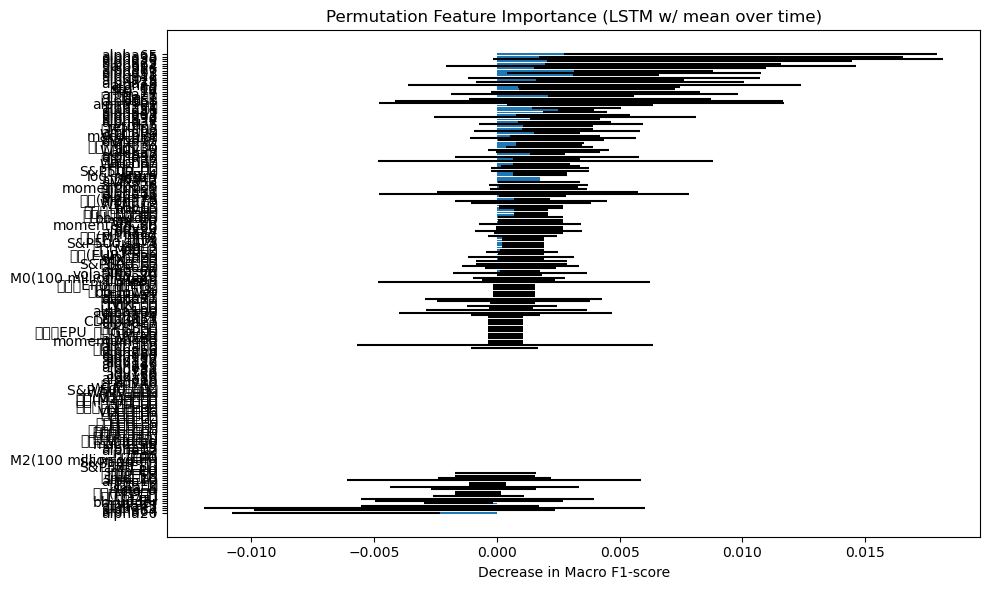

In [69]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# ✅ 데이터 준비 (df는 이미 로드되어 있다고 가정)
change_cut = 0
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ LSTM 모델 학습 (성능 고정용)
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(16)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

lstm_model = Model(inputs, outputs)
lstm_model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=0.21), metrics=['accuracy'])
lstm_model.fit(X_train, y_train,
               validation_data=(X_test, y_test),
               epochs=100,
               batch_size=32,
               callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
               verbose=0,
               class_weight={0: 1.0, 1: 11.0})

# ✅ Threshold 기반 예측
y_proba = lstm_model.predict(X_test).flatten()
best_threshold = 0.4
y_pred = (y_proba > best_threshold).astype(int)

print(f"🎯 Macro F1: {f1_score(y_test, y_pred, average='macro'):.4f}")

# ✅ 시계열 평균 → 2D로 축소
X_test_flat = X_test.mean(axis=1)

# ✅ sklearn-style Wrapper 클래스
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold
        self.classes_ = np.array([0, 1])

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_seq = np.repeat(X[:, np.newaxis, :], seq_length, axis=1)
        probs = self.model.predict(X_seq, verbose=0).flatten()
        return (probs > self.threshold).astype(int)

# ✅ Permutation Importance 실행
wrapped_model = KerasWrapper(lstm_model, threshold=best_threshold)
result = permutation_importance(
    wrapped_model,
    X_test_flat,
    y_test,
    scoring='f1_macro',
    n_repeats=5,
    random_state=42
)

# ✅ 결과 정리
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("\n🎯 상위 중요 피처")
print(importance_df.head(20))

# ✅ 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance_mean'], xerr=importance_df['importance_std'])
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance (LSTM w/ mean over time)")
plt.xlabel("Decrease in Macro F1-score")
plt.tight_layout()
plt.show()


In [70]:

print(importance_df.head(20))


     feature  importance_mean  importance_std
170  alpha65         0.010331        0.007613
145  alpha35         0.009120        0.007420
141  alpha30         0.009018        0.009158
137  alpha25         0.008270        0.006214
168  alpha62         0.006765        0.004790
121   alpha4         0.006266        0.008354
129  alpha16         0.006235        0.004728
167  alpha61         0.005960        0.002828
143  alpha33         0.005582        0.005157
126  alpha11         0.004848        0.001763
115    sto_k         0.004774        0.005960
140  alpha29         0.004610        0.002999
180  alpha73         0.004607        0.005462
123   alpha9         0.004398        0.008000
103   std_60         0.004176        0.003303
99    std_10         0.004068        0.003167
111   rsi_14         0.004020        0.004248
134  alpha21         0.003988        0.005841
59   시가총액_비율         0.003822        0.001752
91     lag_1         0.003795        0.004932


In [99]:
drop_features = ['alpha20',
 'alpha64',
 'alpha87',
 'alpha43',
 '국고채(3년)',
 'bb_upper',
 '일본EPU',
 '상해종합_종가',
 '한국정책금리',
 '한국(M1)조원',
 'sto_d',
 'sma_5',
 '코스피_시가',
 '나스닥_고가',
 'alpha10',
 'sma_20',
 '상해종합_시가',
 '금_거래량']


In [72]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.7982

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       250
           1       0.88      0.73      0.80       300

    accuracy                           0.80       550
   macro avg       0.81      0.81      0.80       550
weighted avg       0.81      0.80      0.80       550

🧩 혼동 행렬:
[[221  29]
 [ 82 218]]


In [73]:
print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))
print(importance_df.head(20))


✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.7982

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       250
           1       0.88      0.73      0.80       300

    accuracy                           0.80       550
   macro avg       0.81      0.81      0.80       550
weighted avg       0.81      0.80      0.80       550

🧩 혼동 행렬:
[[221  29]
 [ 82 218]]
     feature  importance_mean  importance_std
170  alpha65         0.010331        0.007613
145  alpha35         0.009120        0.007420
141  alpha30         0.009018        0.009158
137  alpha25         0.008270        0.006214
168  alpha62         0.006765        0.004790
121   alpha4         0.006266        0.008354
129  alpha16         0.006235        0.004728
167  alpha61         0.005960        0.002828
143  alpha33         0.005582        0.005157
126  alpha11         0.004848        0.001763
115    sto_k   

In [78]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

# 🎯 피처 숙청 반영
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features  # ← 중요도 낮은 애들 제거
], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.8119

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       251
           1       0.84      0.81      0.82       299

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550

🧩 혼동 행렬:
[[205  46]
 [ 57 242]]


In [15]:
print(f"컬럼 수: {X.shape[1]}")
print(X.columns.tolist())

컬럼 수: 180
['중국환율_시가', '중국환율_고가', '중국환율_저가', '중국환율_종가', '중국환율_변동%', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', 'S&P500_종가', 'S&P500_시가', 'S&P500_저가', 'S&P500_변동%', '다우존스_종가', '다우존스_시가', '다우존스_고가', '다우존스_저가', '다우존스_거래량', '다우존스_변동%', '상해종합_종가', '상해종합_고가', '상해종합_저가', '상해종합_거래량', '상해종합_변동%', '닛케이_종가', '닛케이_시가', '닛케이_고가', '닛케이_저가', '닛케이_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '한국(M1)조원', '한국(M1)변동%', '한국(M2)변동%', '미국(M1)십억달러', '미국(M2)십억달러', '소비자심리지수', '생산자물가지수', '산업생산지수', '외환보유액(억달러)', '경상수지', '미국소비자물가지수', '비트코인_검색량', '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준', 'log_return', 'lag_1', 'lag_2'

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': model.feature_importances_
}).sort_values(by='importance_mean', ascending=False)

In [17]:
least_important = importance_df.sort_values(by='importance_mean').head(30)
print(least_important)


         feature  importance_mean
189      alpha86         0.000000
186      alpha81         0.000047
195      alpha99         0.000061
167      alpha61         0.000070
170      alpha65         0.000084
181      alpha74         0.000087
138      alpha27         0.000089
185      alpha79         0.000124
168      alpha62         0.000156
134      alpha21         0.000164
172      alpha68         0.000167
182      alpha75         0.000194
66        미국정책금리         0.000276
69      한국(M2)조원         0.000291
169      alpha64         0.000348
158      alpha58         0.000349
29       상해종합_시가         0.000394
19     S&P500_고가         0.000432
73       소비자심리지수         0.000450
78     미국소비자물가지수         0.000453
79      비트코인_검색량         0.000468
100       sma_20         0.000497
63     CD금리(91일)         0.000498
65        한국정책금리         0.000510
130        adv20         0.000510
83       코스피_검색량         0.000517
81   유로(EUR)_검색량         0.000561
155          cap         0.000571
18     S&P500_

In [13]:
# 하위 18개 피처 추출
least_important = importance_df.sort_values(by='importance_mean').head(18)
drop_features = least_important['feature'].tolist()

# 🎯 X에서 숙청 대상 제거
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features
], errors='ignore')


In [14]:
drop_features

['alpha86',
 'alpha81',
 'alpha99',
 'alpha61',
 'alpha65',
 'alpha74',
 'alpha27',
 'alpha79',
 'alpha62',
 'alpha21',
 'alpha68',
 'alpha75',
 '미국정책금리',
 '한국(M2)조원',
 'alpha64',
 'alpha58',
 '상해종합_시가',
 'S&P500_고가']

In [96]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

# 🎯 피처 숙청 반영
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features  # ← 중요도 낮은 애들 제거
], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.8012

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       251
           1       0.85      0.77      0.81       298

    accuracy                           0.80       549
   macro avg       0.80      0.80      0.80       549
weighted avg       0.81      0.80      0.80       549

🧩 혼동 행렬:
[[211  40]
 [ 69 229]]


In [101]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = 0
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

# 🎯 피처 숙청 반영
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features  # ← 중요도 낮은 애들 제거
], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
from tensorflow.keras.layers import Bidirectional, Add, LayerNormalization, Attention

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# 블록 1
x1 = Bidirectional(LSTM(64, return_sequences=True))(inputs)
x1 = Dropout(0.3)(x1)

# 블록 2 (Residual 연결)
x2 = Bidirectional(LSTM(64, return_sequences=True))(x1)
x2 = Dropout(0.3)(x2)
x = Add()([x1, x2])  # Residual
x = LayerNormalization()(x)

# 블록 3 (Self-Attention)
attention = Attention()([x, x])
x = Add()([x, attention])  # Residual + Attention
x = LSTM(32)(x)

# 출력층
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step

✅ [최종 조합 적용 결과]
change_cut: 0, alpha: 0.21001, threshold: 0.4000, class_weight_1: 11.0, macro f1-score: 0.8139

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       252
           1       0.85      0.79      0.82       297

    accuracy                           0.81       549
   macro avg       0.81      0.82      0.81       549
weighted avg       0.82      0.81      0.81       549

🧩 혼동 행렬:
[[212  40]
 [ 62 235]]


In [103]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = -0.5
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

# 🎯 피처 숙청 반영
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features  # ← 중요도 낮은 애들 제거
], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

✅ [최종 조합 적용 결과]
change_cut: -0.5, alpha: 0.21, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.7492

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       132
           1       0.90      0.83      0.87       417

    accuracy                           0.80       549
   macro avg       0.74      0.77      0.75       549
weighted avg       0.82      0.80      0.81       549

🧩 혼동 행렬:
[[ 93  39]
 [ 69 348]]


위 코드는 하락 범위를 좁게했음 (상승예측을 더 많이하도록)

In [105]:
import joblib

In [106]:
model.save('model_up_cautious.h5')
joblib.dump(scaler, 'scaler_up.pkl')

best_threshold_up = 0.4000
best_alpha_up = 0.21


In [107]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# ✅ Seed 고정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# ✅ Focal Loss 정의
def focal_loss(gamma=2., alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# :흰색_확인_표시: 하이퍼파라미터 범위 설정

change_cut = +0.5
alpha_list = [0.21, 0.21001]       # 성능 중심 구간
threshold_list = [0.4, 0.40001]    # 유효 범위 압축
weight_list = [11.0, 11.0001]     # class_weight_1

# ✅ 결과 저장
final_results = []

# 🎯 데이터 준비
df = df
df['next_day_close'] = df['중국환율_종가'].shift(-1)
df['change'] = df['next_day_close'] - df['중국환율_종가']
df['target'] = (df['change'] >= change_cut).astype(int)
df = df.dropna().reset_index(drop=True)

# 🎯 피처 숙청 반영
X = df.drop(columns=[
    'Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 
    *drop_features  # ← 중요도 낮은 애들 제거
], errors='ignore')
y = df['target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 시퀀스 구성
seq_length = 10
X_seq, y_seq = [], []
for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🎯 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ✅ 튜닝 시작
for class_weight_1 in weight_list:
    class_weights = {0: 1.0, 1: class_weight_1}
    
    for alpha in alpha_list:
        # 모델 구성
        inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
        x = LSTM(64, return_sequences=True)(inputs)
        x = LSTM(32)(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = Model(inputs, outputs)

        model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=100,
                  batch_size=32,
                  callbacks=[early_stop],
                  verbose=0,
                  class_weight=class_weights)

        y_proba = model.predict(X_test).flatten()

        for threshold in threshold_list:
            y_pred = (y_proba > threshold).astype(int)
            macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            final_results.append({
                'alpha': alpha,
                'threshold': threshold,
                'class_weight_1': class_weight_1,
                'macro_f1': macro_f1
            })

# ✅ 최적 조합 선택
df_results = pd.DataFrame(final_results)
best_row = df_results.loc[df_results['macro_f1'].idxmax()]
best_alpha = best_row['alpha']
best_threshold = best_row['threshold']
best_weight = best_row['class_weight_1']

# ✅ 최적 조합 재적용
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(16)(x)  # 마지막 LSTM은 return_sequences=False

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
          verbose=0,
          class_weight={0: 1.0, 1: best_weight})

# ✅ 최종 예측 및 평가
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > best_threshold).astype(int)

print(f"\n✅ [최종 조합 적용 결과]")
print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))
print("🧩 혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

✅ [최종 조합 적용 결과]
change_cut: 0.5, alpha: 0.21001, threshold: 0.4000, class_weight_1: 11.0001, macro f1-score: 0.7518

📊 분류 리포트:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       399
           1       0.71      0.56      0.62       149

    accuracy                           0.82       548
   macro avg       0.78      0.74      0.75       548
weighted avg       0.81      0.82      0.81       548

🧩 혼동 행렬:
[[365  34]
 [ 66  83]]
